# Einführung in neuronale Netze mit Keras

In diesem Notebook wird die Keras API vorgestellt und ein kleines neuronales Netzwerk trainiert. Dokumentation und weitere Tutorials gibt es auf https://keras.io/.

In [1]:
import os
import tarfile
import urllib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

pd.options.mode.chained_assignment = None  # default='warn'
sns.set_context("talk")

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


fetch_housing_data()

In [3]:
housing_data = pd.read_csv("./datasets/housing/housing.csv")
housing_data.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
images_path = os.path.join("./", "images")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/california.png', <http.client.HTTPMessage at 0x7fd2fd7d4820>)

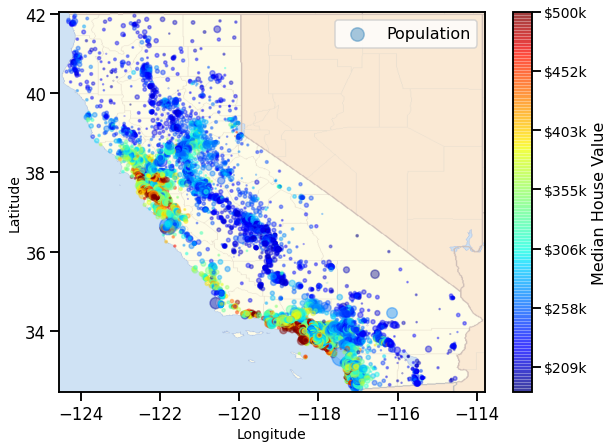

In [5]:
import matplotlib.image as mpimg

california_img = mpimg.imread(os.path.join(images_path, filename))
ax = housing_data.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    figsize=(10, 7),
    s=housing_data["population"] / 100,
    label="Population",
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=False,
    alpha=0.4,
)
plt.imshow(
    california_img,
    extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.5,
    cmap=plt.get_cmap("jet"),
)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing_data["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values / prices.max())
cbar.ax.set_yticklabels(["$%dk" % (round(v / 1000)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

# prepare data

<AxesSubplot:>

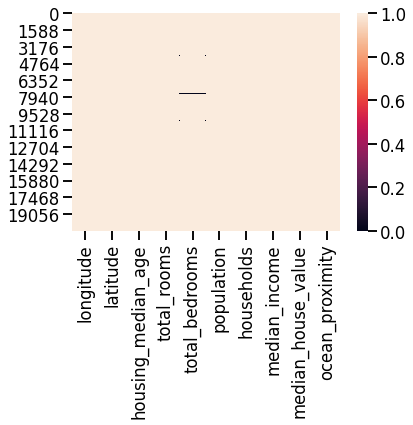

In [6]:
sns.heatmap(housing_data.notna())

In [7]:
housing_data = housing_data.dropna()


# Training a single Neuron with the Keras API

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

X = housing_data.drop(
    columns=["median_house_value", "ocean_proximity", ]
)
y = housing_data["median_house_value"].copy()
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

X_train = scaler.fit_transform(X_train)
y_train = y_train.values

X_test = scaler.transform(X_test)
y_test = y_test.values



In [9]:
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  
0       322.0       126.0         8.3252  
1      2401.0      1138.0         8.3014  
2       496.0       177.0         7.2574  
3       558.0       219.0         5.6431  
4       565.0       259.0         3.8462

In [10]:
X_train.shape  # (samples/instances, features)

(14303, 8)

In [11]:
neuron_model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],), name="Input"),
    keras.layers.Dense(1, activation="linear", name="Neuron")
])

## Woher kommen die 9 Parameter?


In [12]:
neuron_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Neuron (Dense)               (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


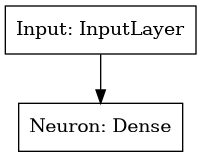

In [13]:
!pip install pydot
keras.utils.plot_model(neuron_model, "single_neuron.png")

In [14]:
neuron_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=5e-4),
    loss=keras.losses.MeanSquaredError(),
    metrics=keras.losses.MeanAbsoluteError(),
)

In [15]:
history = neuron_model.fit(
    x=X_train, y=y_train, batch_size=64, epochs=30, validation_split=0.3
)

Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 53497268923.9494 - mean_absolute_error: 201529.6883 - val_loss: 42179649536.0000 - val_mean_absolute_error: 174286.6094
Epoch 2/30
157/157 [==============================] - 0s 912us/step - loss: 40171389653.8734 - mean_absolute_error: 171483.3906 - val_loss: 32440094720.0000 - val_mean_absolute_error: 148611.2656
Epoch 3/30
157/157 [==============================] - 0s 952us/step - loss: 30862627256.7089 - mean_absolute_error: 145138.5179 - val_loss: 25334020096.0000 - val_mean_absolute_error: 126806.2031
Epoch 4/30
157/157 [==============================] - 0s 906us/step - loss: 23834844134.0760 - mean_absolute_error: 124826.6565 - val_loss: 20143900672.0000 - val_mean_absolute_error: 108669.8281
Epoch 5/30
157/157 [==============================] - 0s 835us/step - loss: 19352715017.7215 - mean_absolute_error: 107936.8197 - val_loss: 16353102848.0000 - val_mean_absolute_error: 94203.6953
Epoch 6/30
157/157 [===

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


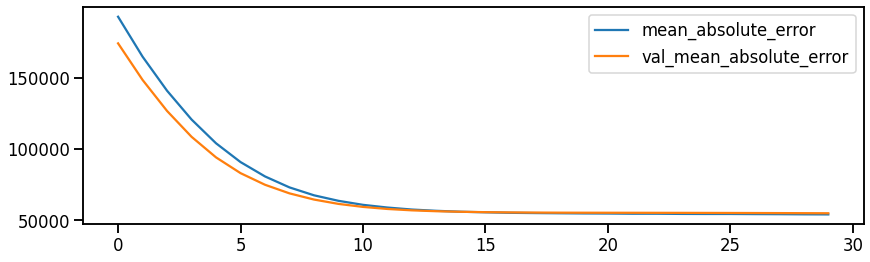

In [16]:
print(history.history.keys())
plt.figure(figsize=(14, 4))
series = history.history["mean_absolute_error"]
plt.plot(range(len(series)), series, label="mean_absolute_error")
series = history.history["val_mean_absolute_error"]
plt.plot(range(len(series)), series, label="val_mean_absolute_error")
plt.legend()
plt.show()

In [17]:
neuron_model.evaluate(X_train, y_train)

447/447 [==============================] - 0s 416us/step - loss: 5472602624.0000 - mean_absolute_error: 54398.2461


[5472602624.0, 54398.24609375]

In [18]:
neuron_model.evaluate(X_test, y_test)

192/192 [==============================] - 0s 476us/step - loss: 5630603264.0000 - mean_absolute_error: 55067.8008


[5630603264.0, 55067.80078125]

## Training a small Network with the Keras API

In [19]:
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import layers, models


In [20]:
X_train.shape

(14303, 8)

In [21]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

network = Sequential(
    [
        Dense(10, input_shape = [X_train.shape[1]], activation="relu"),
        Dense(10,activation="relu"),
        Dense(1, activation="linear"),
    ]
)
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [22]:
network.compile(
    optimizer=keras.optimizers.SGD(learning_rate=5e-4),
#     optimizer='nadam',
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()],
)

In [23]:
history = network.fit(x=X_train, y=y_train, batch_size=32, epochs=25, validation_split=0.3)

Epoch 1/25
313/313 [==============================] - 1s 1ms/step - loss: 209721.4472 - mean_absolute_error: 209721.4472 - val_loss: 205205.6562 - val_mean_absolute_error: 205205.6562
Epoch 2/25
313/313 [==============================] - 0s 990us/step - loss: 208119.0216 - mean_absolute_error: 208119.0216 - val_loss: 205205.2344 - val_mean_absolute_error: 205205.2344
Epoch 3/25
313/313 [==============================] - 0s 899us/step - loss: 208261.2261 - mean_absolute_error: 208261.2261 - val_loss: 205204.7188 - val_mean_absolute_error: 205204.7188
Epoch 4/25
313/313 [==============================] - 0s 874us/step - loss: 207374.1319 - mean_absolute_error: 207374.1319 - val_loss: 205204.1562 - val_mean_absolute_error: 205204.1562
Epoch 5/25
313/313 [==============================] - 0s 916us/step - loss: 208709.5946 - mean_absolute_error: 208709.5946 - val_loss: 205203.2344 - val_mean_absolute_error: 205203.2344
Epoch 6/25
313/313 [==============================] - 0s 894us/step - lo

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


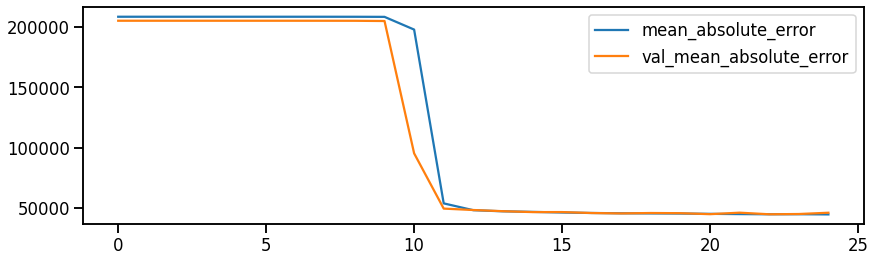

In [24]:
print(history.history.keys())
plt.figure(figsize=(14, 4))
series = history.history["mean_absolute_error"]
plt.plot(range(len(series)), series, label="mean_absolute_error")
series = history.history["val_mean_absolute_error"]
plt.plot(range(len(series)), series, label="val_mean_absolute_error")
plt.legend()
plt.show()

In [25]:
network.evaluate(X_train, y_train)

447/447 [==============================] - 0s 509us/step - loss: 45488.2891 - mean_absolute_error: 45488.2891


[45488.2890625, 45488.2890625]

In [26]:
network.evaluate(X_test,y_test)

192/192 [==============================] - 0s 486us/step - loss: 45611.8867 - mean_absolute_error: 45611.8867


[45611.88671875, 45611.88671875]

## Übung:

* Verwende den Code von oben und trainiere das Modell mit Mean-Absolute-Error loss und probiere andere Netzwerk Architekturen aus (mehr Layer, mehr Neuronen usw)
    * keras.losses.MeanAbsoluteError()
    
* Probiere verschiedene Aktivierungsfunktionen für die Neurone. Was ändert sich am Verlauf des Losses?
    * Für eine Liste von Aktivierungsfunktionen siehe https://keras.io/api/layers/activations/#available-activations

## Zusatzübung:

* Skaliere die Zielvariable, so dass die Größenordnung ~1. Verbessert sich dadurch die Performance des Modells?

# Zusatzübung 2:

Die folgenden Daten wurden vorbereitet:

Aufgabe:

* Trainiere ein neuronales Netzwerk welches MPG vorhersagt
* Teste die Performance dem Testdatensatz (80%:20% split)

Hinweis: Dies geht mit "model.evaluate(test_features, test_labels)"

In [27]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(
    url, names=column_names,
    na_values='?', comment='\t',
    sep=' ', skipinitialspace=True
)
dataset = raw_dataset.copy().drop(columns=["Origin"])
dataset.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year
0  18.0          8         307.0       130.0  3504.0          12.0          70
1  15.0          8         350.0       165.0  3693.0          11.5          70
2  18.0          8         318.0       150.0  3436.0          11.0          70
3  16.0          8         304.0       150.0  3433.0          12.0          70
4  17.0          8         302.0       140.0  3449.0          10.5          70

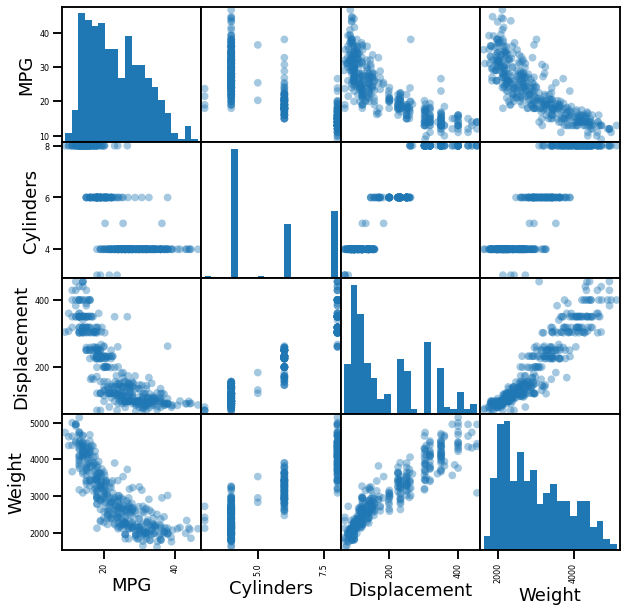

In [28]:
dataset = dataset.dropna()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

pd.plotting.scatter_matrix(
    dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], 
    figsize=(10, 10), marker='o', 
    hist_kwds={'bins': 20},
    s=60, 
    alpha=.4
)
plt.show()

In [29]:
train_dataset.describe().transpose()

count         mean         std     min      25%     50%  \
MPG           314.0    23.310510    7.728652    10.0    17.00    22.0   
Cylinders     314.0     5.477707    1.699788     3.0     4.00     4.0   
Displacement  314.0   195.318471  104.331589    68.0   105.50   151.0   
Horsepower    314.0   104.869427   38.096214    46.0    76.25    94.5   
Weight        314.0  2990.251592  843.898596  1649.0  2256.50  2822.5   
Acceleration  314.0    15.559236    2.789230     8.0    13.80    15.5   
Model Year    314.0    75.898089    3.675642    70.0    73.00    76.0   

                  75%     max  
MPG             28.95    46.6  
Cylinders        8.00     8.0  
Displacement   265.75   455.0  
Horsepower     128.00   225.0  
Weight        3608.00  5140.0  
Acceleration    17.20    24.8  
Model Year      79.00    82.0

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')